In [4]:
from utils.libreries import *

In [3]:
file_path = "data/raw/spreadspoke_scores.csv"

#Hacemos la llamada a nuestro DF
scores = pd.read_csv(file_path)
scores.head(5)

NameError: name 'scores' is not defined

In [4]:
scores.describe().T

,count,mean,std,min,25%,50%,75%,max
schedule_season,13516.0,1996.082939,16.144258,1966.0,1983.0,1997.0,2010.0,2022.0
score_home,13516.0,22.461897,10.526423,0.0,15.0,22.0,29.0,72.0
score_away,13516.0,19.784848,10.165222,0.0,13.0,20.0,27.0,62.0
spread_favorite,11037.0,-5.385204,3.439617,-26.5,-7.0,-4.5,-3.0,0.0
weather_temperature,12309.0,58.833211,15.538656,-6.0,48.0,62.0,72.0,97.0
weather_wind_mph,12293.0,7.689010,5.694124,0.0,3.0,8.0,11.0,40.0
weather_humidity,8468.0,67.212801,15.796414,4.0,57.0,69.0,79.0,100.0


In [5]:
scores.isnull().sum()

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home                 0
score_away                 0
team_away                  0
team_favorite_id        2479
spread_favorite         2479
over_under_line         2489
stadium                    0
stadium_neutral            0
weather_temperature     1207
weather_wind_mph        1223
weather_humidity        5048
weather_detail         10597
dtype: int64

In [6]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13516 entries, 0 to 13515
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13516 non-null  object 
 1   schedule_season      13516 non-null  int64  
 2   schedule_week        13516 non-null  object 
 3   schedule_playoff     13516 non-null  bool   
 4   team_home            13516 non-null  object 
 5   score_home           13516 non-null  int64  
 6   score_away           13516 non-null  int64  
 7   team_away            13516 non-null  object 
 8   team_favorite_id     11037 non-null  object 
 9   spread_favorite      11037 non-null  float64
 10  over_under_line      11027 non-null  object 
 11  stadium              13516 non-null  object 
 12  stadium_neutral      13516 non-null  bool   
 13  weather_temperature  12309 non-null  float64
 14  weather_wind_mph     12293 non-null  float64
 15  weather_humidity     8468 non-null  

### DATA PROCESSING

Después de cargar nuestros datos en crudo procedemos a trabajar sobre ellos.

In [7]:
#Nos quedamos solo con la temporada regular. Procedemos a eliminar los playoffs
scores = scores[scores['schedule_playoff'] == 0]
scores = scores.loc[scores['schedule_season'] >= 1980]

In [8]:
#Establecemos como punto de partida la temporada 1980.
# scores = scores.loc[scores['schedule_season'] >= 1980]

In [9]:
#Cambiamos el formato de las columnas para que sean numéricas
scores = scores.astype({'schedule_playoff': int,
                        'schedule_week': int,
                        'over_under_line': float
                        })

In [10]:
from datetime import datetime

def transform_date(schedule_date):
    """
    Transforma la fecha en formato "mm/dd/yyyy" a "mm-dd-yyyy".
    """
    date1 = datetime.strptime(schedule_date, "%m/%d/%Y")
    return date1.strftime("%m-%d-%Y")

# Transformar la columna 'schedule_date' del DataFrame 'scores'
scores['schedule_date'] = scores['schedule_date'].apply(transform_date)


In [11]:
#Eliminamos los NANs de las columnas debido su antiguedad y que pueden ser irrelevantes
scores.isnull().sum()

schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home                 0
score_home                0
score_away                0
team_away                 0
team_favorite_id          0
spread_favorite           0
over_under_line           0
stadium                   0
stadium_neutral           0
weather_temperature     692
weather_wind_mph        691
weather_humidity       4188
weather_detail         7690
dtype: int64

In [12]:
# Eliminamos las columnas que no nos interesan debido a alto numero de NANs "weather_detail", "weather_humidity"
# Eliminamos la columna "schedule_playoff" que no nos interesa 

scores = scores.drop(columns=["schedule_playoff","weather_detail", "weather_humidity", "stadium_neutral"])

In [13]:
#Tratamos los Nans de nuestras columnas. Para la columna "weather_temperature" utizamos media al ser simitrica su distrubucion.
# Para la columna "weather_humidity" la media debido a que tiende a ser una distrubucion logaritmica.
scores = scores.fillna({'weather_temperature': scores['weather_temperature'].median(),
                        'weather_wind_mph': (scores['weather_wind_mph'].median())})


In [14]:
scores = scores.reset_index(drop=True)

In [15]:
scores

,schedule_date,schedule_season,schedule_week,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,weather_temperature,weather_wind_mph
0,09-07-1980,1980,1,Buffalo Bills,17,7,Miami Dolphins,MIA,-3.0,35.0,Ralph Wilson Stadium,64.0,8.0
1,09-07-1980,1980,1,Cincinnati Bengals,12,17,Tampa Bay Buccaneers,TB,-1.0,34.0,Cinergy Field,72.0,9.0
2,09-07-1980,1980,1,Green Bay Packers,12,6,Chicago Bears,CHI,-6.0,35.0,Lambeau Field,65.0,5.0
3,09-07-1980,1980,1,Kansas City Chiefs,14,27,Oakland Raiders,KC,-3.0,42.0,Arrowhead Stadium,82.0,10.0
4,09-07-1980,1980,1,Los Angeles Rams,20,41,Detroit Lions,LAR,-9.0,38.0,Anaheim Stadium,66.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10312,01-08-2023,2022,18,Philadelphia Eagles,22,16,New York Giants,PHI,-17.0,43.0,Lincoln Financial Field,64.0,7.0
10313,01-08-2023,2022,18,Pittsburgh Steelers,28,14,Cleveland Browns,PIT,-2.5,40.0,Acrisure Stadium,64.0,7.0
10314,01-08-2023,2022,18,San Francisco 49ers,38,13,Arizona Cardinals,SF,-14.5,40.0,Levi's Stadium,64.0,7.0
10315,01-08-2023,2022,18,Seattle Seahawks,19,16,Los Angeles Rams,SEA,-4.5,43.0,Lumen Field,64.0,7.0


### FEATURES

In [16]:
# Calcula la diferencia de puntajes entre el equipo local y visitante
scores['score_diff'] = scores['score_home'] - scores['score_away']


In [17]:
#Creamos nuestro target llamado "winner"
def calcular_ganador(row):
    if row['score_home'] > row['score_away']:
        return 1
    elif row['score_home'] < row['score_away']:
        return 0
    else:
        return "tie"

# Creamos la nueva columna "winner" que será nuestro target
scores['winner'] = scores.apply(calcular_ganador, axis=1)


In [18]:
#Buscamos un resultado de victoria y vemos que desde 1980 en temporada regular solo han habido 26 empates procedemos a eliminarlo.
scores["winner"].value_counts()

1      5896
0      4395
tie      26
Name: winner, dtype: int64

In [19]:
scores = scores[scores['winner'] != "tie"]

In [20]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10291 entries, 0 to 10316
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        10291 non-null  object 
 1   schedule_season      10291 non-null  int64  
 2   schedule_week        10291 non-null  int64  
 3   team_home            10291 non-null  object 
 4   score_home           10291 non-null  int64  
 5   score_away           10291 non-null  int64  
 6   team_away            10291 non-null  object 
 7   team_favorite_id     10291 non-null  object 
 8   spread_favorite      10291 non-null  float64
 9   over_under_line      10291 non-null  float64
 10  stadium              10291 non-null  object 
 11  weather_temperature  10291 non-null  float64
 12  weather_wind_mph     10291 non-null  float64
 13  score_diff           10291 non-null  int64  
 14  winner               10291 non-null  object 
dtypes: float64(4), int64(5), object(6)
m

In [21]:
scores = scores.astype({'winner': int,
                        "team_home":"category",
                        "team_away":"category",
                        "team_favorite_id":"category",
                        "stadium":"category",
                        })

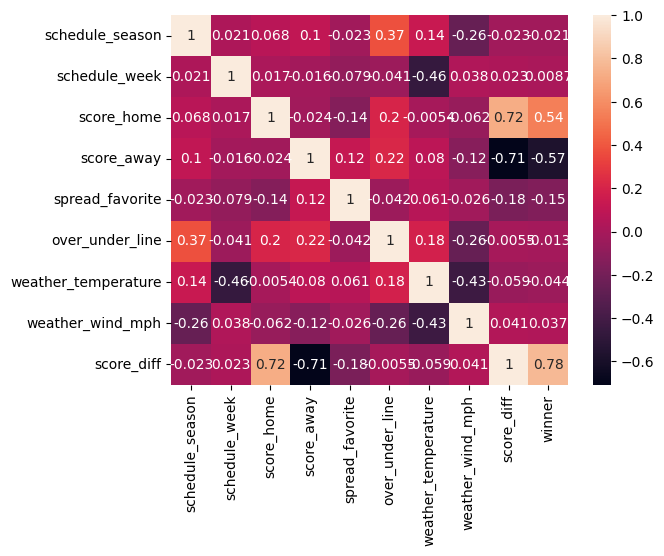

In [22]:
sns.heatmap(scores.corr().drop(["winner"]), annot=True);

## 4. Procesamiento de la data

In [23]:
# X = scores.drop(["winner"], axis=1)
# y = scores["winner"]

In [24]:
# X = scores.drop(['winner',"schedule_date", "team_away", "team_home", "team_favorite_id", "stadium",], axis=1)
# y = scores['winner'].copy()
# X.shape

In [25]:
# import xgboost as xgb
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
# from sklearn.svm import LinearSVC

In [26]:
# # prepare models
# from sklearn import model_selection


# models = []

# # Classifiers to use in Voting
# boost = xgb.XGBClassifier()
# dtc = DecisionTreeClassifier(max_depth=5, criterion='entropy')
# lrg = LogisticRegression(solver='liblinear')
# vote = VotingClassifier(estimators=[('boost', boost), ('dtc', dtc), ('lrg', lrg)], voting='soft')

# models.append(('LRG', LogisticRegression(solver='liblinear', max_iter=250)))
# models.append(('KNB', KNeighborsClassifier()))
# # models.append(('GNB', GaussianNB()))
# models.append(('XGB', xgb.XGBClassifier(random_state=0)))
# models.append(('RFC', RandomForestClassifier(random_state=0, n_estimators=100)))
# models.append(('DTC', DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=5)))
# models.append(('SVC', LinearSVC(random_state=0)))
# models.append(('VOTE', VotingClassifier(estimators=[('boost', boost), ('dtc', dtc), ('lrg', lrg)], voting='soft')))
# # models.append(('CCV', CCV(vote, method='isotonic', cv=3)))
# # models.append(('MLP', MLPClassifier()))
# models.append(('ADA', AdaBoostClassifier(random_state=0)))

# # evaluate each model by average of roc auc 
# results_dict = {}

# for name, m in models:
#     kfold = model_selection.KFold(n_splits=5) 
#     cv_results = model_selection.cross_val_score(m, X, y, cv=kfold, scoring = 'roc_auc') # or 'accuracy'
#     results_dict.update({name: "%f" % cv_results.mean()})
    
#     results_dict = {}

In [27]:
# sorted(((v,k) for k,v in results_dict.items()), reverse=True)

In [39]:
from lazypredict.Supervised import LazyClassifier 
from sklearn.model_selection import train_test_split

X = scores.drop(['winner',"schedule_date", "team_away", "team_home", "team_favorite_id", "stadium",], axis=1)
y= scores.winner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:05<00:00,  5.66it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
SGDClassifier                      1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
Perceptron                         1.00               1.00     1.00      1.00   
PassiveAggressiveClassifier        1.00               1.00     1.00      1.00   
LogisticRegression                 1.00               1.00     1.00      1.00   
LinearSVC                          1.00               1.00     1.00      1.00   
LGBMClassifier                     1.00               1.00     1.00      1.00   
ExtraTreesClassifier        

In [40]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.03
BaggingClassifier,1.00,1.00,1.00,1.00,0.03
XGBClassifier,1.00,1.00,1.00,1.00,0.08
SGDClassifier,1.00,1.00,1.00,1.00,0.02
RandomForestClassifier,1.00,1.00,1.00,1.00,0.32
Perceptron,1.00,1.00,1.00,1.00,0.05
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.01
LogisticRegression,1.00,1.00,1.00,1.00,0.08
LinearSVC,1.00,1.00,1.00,1.00,0.15
